# Read Data & Data Understanding 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Read Data
data_customer_int = pd.read_excel('datasetfix.xlsx','customer_interaction')
data_prod_details = pd.read_excel('datasetfix.xlsx','product_details')
data_purchase = pd.read_excel('datasetfix.xlsx','purchase_history')

In [3]:
data_customer_int.describe()

,customer_id,page_views,time_spent
count,30.000000,30.000000,30.000000
mean,15.500000,25.000000,207.200000
std,8.803408,12.632743,90.044587
min,1.000000,3.000000,42.000000
25%,8.250000,17.250000,144.000000
50%,15.500000,26.500000,210.000000
75%,22.750000,34.250000,262.500000
max,30.000000,43.000000,360.000000


In [4]:
data_prod_details.describe()

,product_id,price,ratings
count,550.000000,550.000000,550.000000
mean,5516.572727,482.305455,3.987636
std,2557.800515,291.671930,0.589798
min,1023.000000,13.000000,3.000000
25%,3252.500000,221.000000,3.500000
50%,5491.000000,447.500000,4.000000
75%,7786.250000,755.250000,4.500000
max,9989.000000,993.000000,5.000000


In [5]:
data_purchase.describe()

,customer_id,product_id
count,1500.000000,1500.000000
mean,15.227333,5350.324000
std,8.637827,2553.744703
min,1.000000,1023.000000
25%,8.000000,3103.000000
50%,15.000000,5273.000000
75%,23.000000,7551.000000
max,30.000000,9989.000000


In [6]:
#knowing the size of our dataset
data_purchase.shape

(1500, 3)

In [7]:
data_prod_details.shape

(550, 4)

In [8]:
#check type data
data_purchase.dtypes

customer_id               int64
product_id                int64
purchase_date    datetime64[ns]
dtype: object

In [9]:
data_prod_details['category'] = data_prod_details['category'].astype('string')
data_prod_details.dtypes

product_id      int64
category       string
price           int64
ratings       float64
dtype: object

In [10]:
data_customer_int.dtypes

customer_id    int64
page_views     int64
time_spent     int64
dtype: object

In [11]:
#check duplicate of our data
data_prod_details.duplicated().sum()

0

In [12]:
#complete join data
x = pd.merge(data_purchase,data_customer_int, left_on = 'customer_id', right_on ='customer_id', how = 'right')
datalengkap = pd.merge(x,data_prod_details, left_on = 'product_id', right_on = 'product_id')

In [13]:
datalengkap.to_excel('datagabungan.xlsx', index=False)

In [14]:
#cek produk id
data2nd = pd.merge(data_purchase,data_prod_details, left_on = 'product_id', right_on = 'product_id').sort_values(by=['customer_id','product_id'])
data2nd.head(20)

,customer_id,product_id,purchase_date,category,price,ratings
908,1,1175,2024-01-12,Electronic,86,4.3
288,1,1366,2023-08-16,Electronic,897,4.1
924,1,1422,2024-01-14,Clothing,40,3.3
925,1,1422,2024-01-14,Electronic,814,3.2
747,1,1534,2023-07-12,Home & Kitchen,963,4.2
841,1,1790,2023-05-07,Health,699,4.0
390,1,1809,2023-09-13,Clothing,562,3.3
1244,1,2232,2023-07-17,Beauty,189,3.4
704,1,2329,2023-11-07,Beauty,880,4.7
1520,1,2355,2023-04-22,Home & Kitchen,635,3.4


1. Ternyata 1 produk bisa memiliki lebih dari 1 kategori (lihat product id 1422)

# Exploratory Data Analysis (EDA)

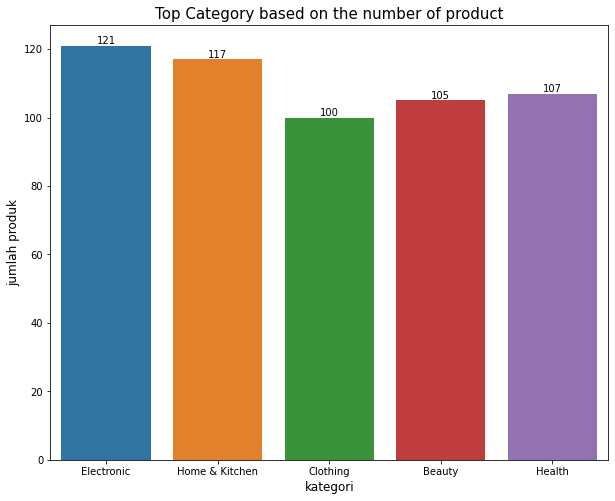

In [15]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x = 'category',
            data = data_prod_details)
plt.xlabel("kategori", size=12)
plt.ylabel("jumlah produk", size=12)
plt.title("Top Category based on the number of product", size=15)
for container in ax.containers:
    ax.bar_label(container)

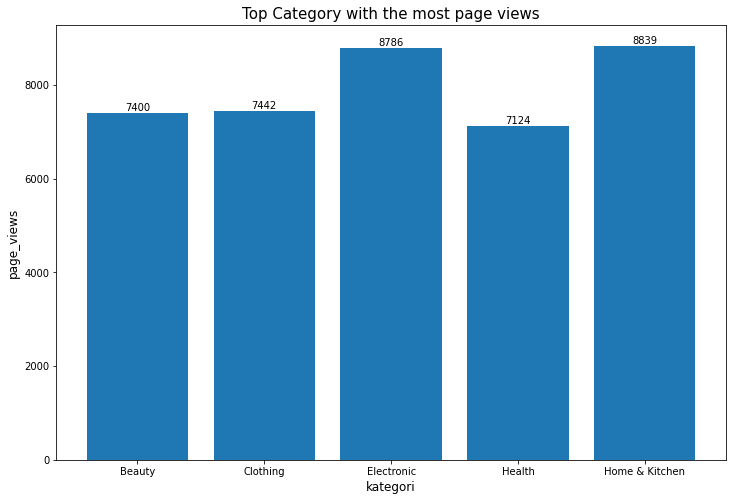

In [16]:
#Top category based on page views
dims = (10, 8)
datapage = pd.DataFrame(datalengkap.groupby('category')['page_views'].sum()).reset_index()
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(datapage.category, datapage.page_views)
plt.xlabel("kategori", size=12)
plt.ylabel("page_views", size=12)
plt.title("Top Category with the most page views", size=15)
for container in ax.containers:
    ax.bar_label(container)

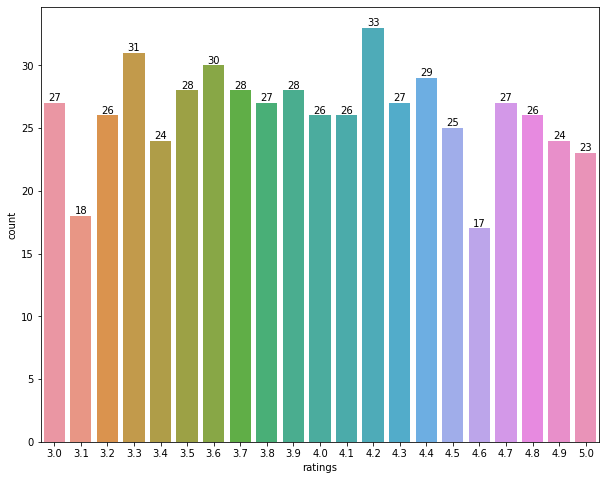

In [17]:
#Persebaran Ratings product
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x = 'ratings',
            data = data_prod_details)
for container in ax.containers:
    ax.bar_label(container)

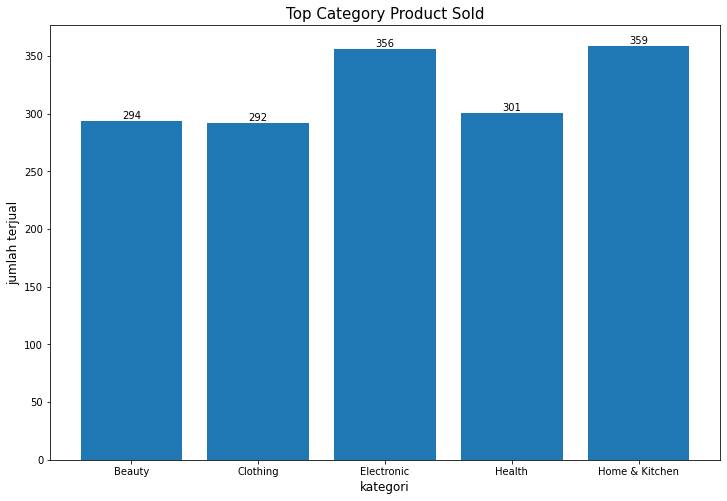

In [18]:
#Top Category Product Sold
datasold = pd.DataFrame(datalengkap.groupby('category')['product_id'].size()).reset_index()
datasold
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(datasold.category, datasold.product_id)
plt.xlabel("kategori", size=12)
plt.ylabel("jumlah terjual", size=12)
plt.title("Top Category Product Sold", size=15)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

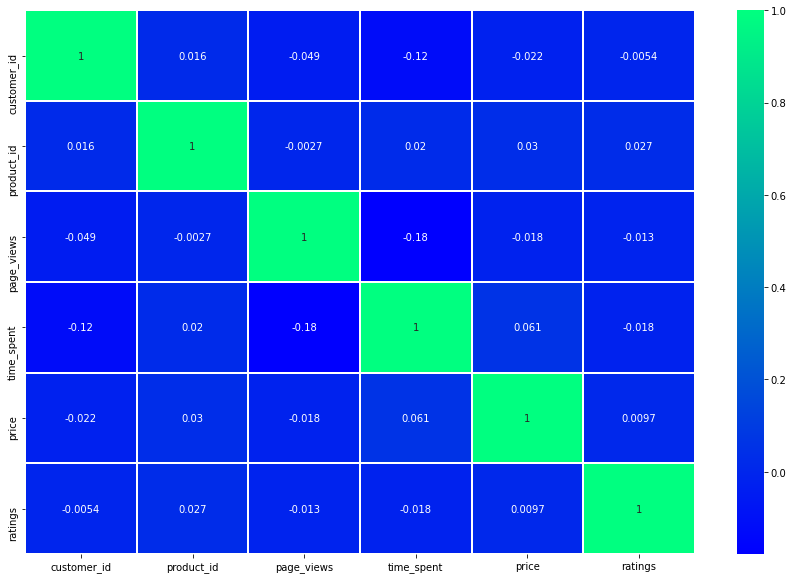

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(datalengkap.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
#data kurang menarik

There is no interesting remarks for correlation among the variables since the correlation value is relatively low.

In [20]:
#data eksplisit for recommendation system
dataset = datalengkap[['customer_id','product_id','ratings']]
dataset.head()

,customer_id,product_id,ratings
0,1,4681,4.7
1,29,4681,4.7
2,1,3781,4.2
3,9,3781,4.2
4,19,3781,4.2


In [21]:
#cek duplicate
dataset.duplicated().sum()

79

In [22]:
#Remove Duplicate
dfs = dataset.copy().drop_duplicates()
dfs.duplicated().sum()

0

# Recommendation system by using Surprise Framework

In [23]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
from surprise import SVD
from surprise import NMF
# Define the Reader
reader = Reader(rating_scale=(1, 5))

# Load the data from the DataFrame
data = Dataset.load_from_df(dfs, reader)

In [24]:
# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [25]:
# SVD algorithm
algo_svd = SVD()
prediction_mf = algo_svd.fit(trainset).test(testset)

In [26]:
accuracy.mae(prediction_mf)
accuracy.rmse(prediction_mf)

MAE:  0.4557
RMSE: 0.5374


0.5373912180122187

In [27]:
# KNNBasic
sim_options = {
    'name': 'cosine',
    'user_based': False
}
algo = KNNBasic(sim_options=sim_options)
# Train the algorithm on the training set
algo.fit(trainset)
# Make predictions on the test set
predictions = algo.test(testset)
# Evaluate the accuracy of the model
accuracy.mae(predictions)
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.5564
RMSE: 0.6632


0.6632113096333665

In [28]:
#NMF Algorithm
nmf = NMF(n_epochs=25)
prediction_nmf = nmf.fit(trainset).test(testset)

In [29]:
accuracy.mae(prediction_nmf)
accuracy.rmse(prediction_nmf)

MAE:  0.4313
RMSE: 0.5488


0.5488004128603998

In [30]:
from collections import defaultdict
top_n = defaultdict(list)
for uid, iid, true_r, est, _ in prediction_nmf:
  top_n[uid].append((iid, est))

In [31]:
k = 5
for uid, user_ratings in top_n.items():
  user_ratings.sort(key=lambda x: x[1], reverse=True)
  top_n[uid] = user_ratings[:k]

In [32]:
print("Test Recommendations")
print("-" * 80)
for uid, user_ratings in list(top_n.items())[:10]:
  items = [iid for (iid, _) in user_ratings]
  print(f"UserId {uid}\nitems: {items}")

Test Recommendations
--------------------------------------------------------------------------------
UserId 9
items: [5787, 4090, 4475, 6692, 2925]
UserId 20
items: [4090, 7279, 5929, 5929, 5684]
UserId 28
items: [4848, 4302, 7279, 8451, 5929]
UserId 18
items: [4090, 9036, 5842, 6692, 5846]
UserId 4
items: [2064, 5684, 6842, 6927, 1242]
UserId 25
items: [3986, 5334, 3522, 5679, 7551]
UserId 1
items: [9941, 2329, 3781, 1175, 3041]
UserId 29
items: [4302, 5146, 4138, 4405, 6772]
UserId 22
items: [5222, 2260, 5950, 5679, 3698]
UserId 10
items: [1096, 9748, 2191, 4803, 1865]


In [33]:
data = data = [(uid, iid, est) for uid, iid, est, *_ in prediction_nmf]
iju = pd.DataFrame(data, columns=['user_id', 'item_id', 'estimated_rating'])

In [34]:
# Sort the DataFrame by user_id and estimated_rating
df_sorted = iju.sort_values(['user_id', 'estimated_rating'], ascending=[True, False])
# Select the top 5 recommendations for each user
top_5_recommendations = df_sorted.groupby('user_id').head(5)

In [35]:
top_5_recommendations[top_5_recommendations.user_id==1]

,user_id,item_id,estimated_rating
149,1,6501,4.9
226,1,9941,4.9
122,1,2329,4.7
213,1,4011,4.5
223,1,3522,4.4


In [36]:
# Save the DataFrame to an Excel file
top_5_recommendations.to_excel('recommendations.xlsx', index=False)

# Predictive analysis

In [37]:
#Data Join looks like
datalengkap.head()

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings
0,1,4681,2023-09-07,17,192,Home & Kitchen,628,4.7
1,29,4681,2023-07-21,13,204,Home & Kitchen,628,4.7
2,1,3781,2023-04-17,17,192,Home & Kitchen,812,4.2
3,9,3781,2023-12-04,4,252,Home & Kitchen,812,4.2
4,19,3781,2023-09-03,9,138,Home & Kitchen,812,4.2


In [38]:
#Total product bought by customer
databought = pd.DataFrame(data_purchase.groupby('customer_id').size()).reset_index()
databought.columns = ['customer_id', 'productsold']

In [64]:
#Set variable input & target and define proportion between training data and testing data
from sklearn.model_selection import train_test_split, GridSearchCV
X= datalengkap[['page_views','time_spent','price','ratings']]
Y= datalengkap.iloc[:,1]   
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, shuffle=True,random_state=64)
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, shuffle=True, random_state=128)

print('Number of rows in the total set: {}'.format(datalengkap.shape[0]))
print('Number of rows in the training set: {}'.format(len(X_train)))
print('Number of rows in the test set: {}'.format(len(X_test)))

Number of rows in the total set: 1602
Number of rows in the training set: 1441
Number of rows in the test set: 161


In [40]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test,average='macro')

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train,average='macro')

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [41]:
# make a list of models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from time import time
models = [DecisionTreeClassifier(), 
          GaussianNB(), 
          KNeighborsClassifier(),RandomForestClassifier()]

In [65]:
re = pipeline(models, X_train, y_train, X_test, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'F1 Score: Train', 'Training Time'])

Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 0.03 sec
----------------------------------------------------
Training GaussianNB
Training GaussianNB finished in 0.02 sec
----------------------------------------------------
Training KNeighborsClassifier
Training KNeighborsClassifier finished in 0.00 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 1.66 sec
----------------------------------------------------


In [66]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'Accuracy: Test', inplace = True, ascending = False)
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,F1 Score: Test,Prediction Time,Accuracy: Train,F1 Score: Train,Training Time
0,DecisionTreeClassifier,0.826087,0.746711,0.006317,0.999306,0.999522,0.027710
1,RandomForestClassifier,0.590062,0.423297,0.510333,0.999306,0.999522,1.663453
2,GaussianNB,0.540373,0.524620,0.052942,0.943789,0.979361,0.024782
3,KNeighborsClassifier,0.062112,0.026285,0.047930,0.306037,0.170550,0.002689


In [67]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]

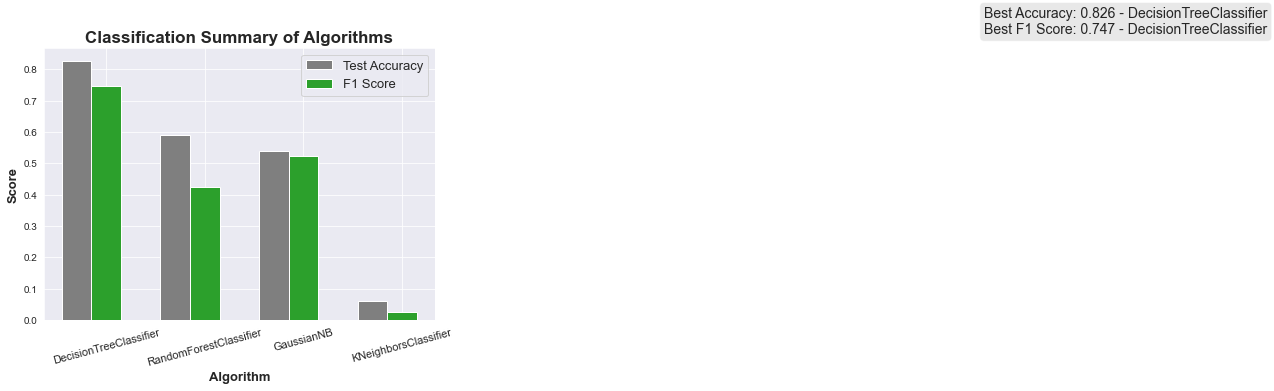

In [68]:
sns.set_style('darkgrid')
plt.figure(figsize = (7, 5))

barWidth = 0.3
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[7], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[2], width=barWidth, edgecolor='white', label='F1 Score')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9.2, 1, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

Our final model is Decision Tree

In [69]:
finalmodel = models[0]

In [70]:
#test model
input=(28,165,256,4.5) #page_views,time_spent,price,ratings
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre=finalmodel.predict(input_reshaped)
print('customer will buy product : ',pre[0])

customer will buy product :  3913


/Users/izzamuna/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
